# Lista 3 - Exercício 1

No espaço 2D, têm-se duas classes equiprováveis com médias $m_1 = [0, 0]^T$ e $m_2 = [1.5, 1.5]^T$ e matrizes de covariância $S_1 = S_2 = 0.2I$, sendo $I$ uma matriz identidade $2 \times 2$.


**a)** Gere e plote um conjunto de dados $X_1$, contendo 200 exemplos por classe (400 no total), a ser utilizado como conjunto de treinamento (utilize o valor 10 como _seed_). Gere um segundo conjunto de dados $X_2$ contendo 200 exemplos por classe para ser utilizado como conjunto de teste (utilize o valor 100 como _seed_).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ioff() # Disable interactive mode
from sklearn.svm import SVC

N = 200

mu  = np.array([[0, 0], [1.5, 1.5]])
cov = 0.2 * np.identity(2)

train = np.vstack([np.random.default_rng(10).multivariate_normal(m, cov, N) for m in mu])
test  = np.vstack([np.random.default_rng(100).multivariate_normal(m, cov, N) for m in mu])

labels = [1] * N + [2] * N

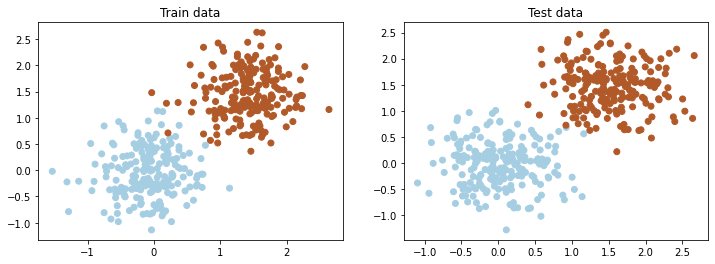

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(train[:, 0], train[:, 1], c=labels, cmap=plt.cm.Paired)
axs[0].set_title('Train data')

axs[1].scatter(test[:, 0], test[:, 1], c=labels, cmap=plt.cm.Paired)
axs[1].set_title('Test data')

plt.show(fig)

**b)** Com base em $X_1$, gere seis classificadores do tipo SVM para separar as duas classes, variando $C = 0.1, 0.2, 0.5, 1, 2, 20$. Utilize o algoritmo de Platt e $\text{tol} = 0.001$.

In [3]:
def svm_fit_plot(X, C, ax):
    
    # fit the model
    clf = SVC(kernel='linear', C=C, tol=0.001)
    clf.fit(X, labels)

    # plot data
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    
    ax.set_title('Linear SVM for C = {}'.format(C))
    
    return clf

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

clf1 = svm_fit_plot(train, 0.1, axs[0, 0])
clf2 = svm_fit_plot(train, 0.2, axs[0, 1])
clf3 = svm_fit_plot(train, 0.5, axs[1, 0])
clf4 = svm_fit_plot(train, 1,   axs[1, 1])
clf5 = svm_fit_plot(train, 2,   axs[2, 0])
clf6 = svm_fit_plot(train, 20,  axs[2, 1])

**I.** Calcule os erros de classificação dos conjuntos de treino e teste.

In [5]:
print("Erro de classificação para C = 0.1: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf1.score(train, labels), 1 - clf1.score(test, labels)))
print("Erro de classificação para C = 0.2: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf2.score(train, labels), 1 - clf2.score(test, labels)))
print("Erro de classificação para C = 0.5: Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf3.score(train, labels), 1 - clf3.score(test, labels)))
print("Erro de classificação para C = 1:   Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf4.score(train, labels), 1 - clf4.score(test, labels)))
print("Erro de classificação para C = 2:   Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf5.score(train, labels), 1 - clf5.score(test, labels)))
print("Erro de classificação para C = 20:  Treino - {:.4f}%\tTeste - {:.4f}%".format(1 - clf6.score(train, labels), 1 - clf6.score(test, labels)))

Erro de classificação para C = 0.1: Treino - 0.0025%	Teste - 0.0075%
Erro de classificação para C = 0.2: Treino - 0.0025%	Teste - 0.0075%
Erro de classificação para C = 0.5: Treino - 0.0025%	Teste - 0.0075%
Erro de classificação para C = 1:   Treino - 0.0025%	Teste - 0.0075%
Erro de classificação para C = 2:   Treino - 0.0025%	Teste - 0.0075%
Erro de classificação para C = 20:  Treino - 0.0100%	Teste - 0.0100%


**II.** Conte o número de vetores suporte.

In [6]:
print("Vetores de suporte para C = 0.1: ", np.sum(clf1.n_support_))
print("Vetores de suporte para C = 0.2: ", np.sum(clf2.n_support_))
print("Vetores de suporte para C = 0.5: ", np.sum(clf3.n_support_))
print("Vetores de suporte para C = 1:   ", np.sum(clf4.n_support_))
print("Vetores de suporte para C = 2:   ", np.sum(clf5.n_support_))
print("Vetores de suporte para C = 20:  ", np.sum(clf6.n_support_))

Vetores de suporte para C = 0.1:  52
Vetores de suporte para C = 0.2:  38
Vetores de suporte para C = 0.5:  26
Vetores de suporte para C = 1:    21
Vetores de suporte para C = 2:    16
Vetores de suporte para C = 20:   11


**III.** Calcule o valor da margem ($\frac{2}{||w||}$).

In [7]:
print("Valor da margem para C = 0.1: {:.4}".format(2 / np.linalg.norm(clf1.coef_[0])))
print("Valor da margem para C = 0.2: {:.3}".format(2 / np.linalg.norm(clf2.coef_[0])))
print("Valor da margem para C = 0.5: {:.3}".format(2 / np.linalg.norm(clf3.coef_[0])))
print("Valor da margem para C = 1:   {:.3}".format(2 / np.linalg.norm(clf4.coef_[0])))
print("Valor da margem para C = 2:   {:.3}".format(2 / np.linalg.norm(clf5.coef_[0])))
print("Valor da margem para C = 20:  {:.3}".format(2 / np.linalg.norm(clf6.coef_[0])))

Valor da margem para C = 0.1: 1.116
Valor da margem para C = 0.2: 0.973
Valor da margem para C = 0.5: 0.781
Valor da margem para C = 1:   0.665
Valor da margem para C = 2:   0.558
Valor da margem para C = 20:  0.338


**IV.** Plote o classificador em conjunto com as margens. Comente os resultados obtidos nas etapas anteriores. Qual a influência do parâmetro C?

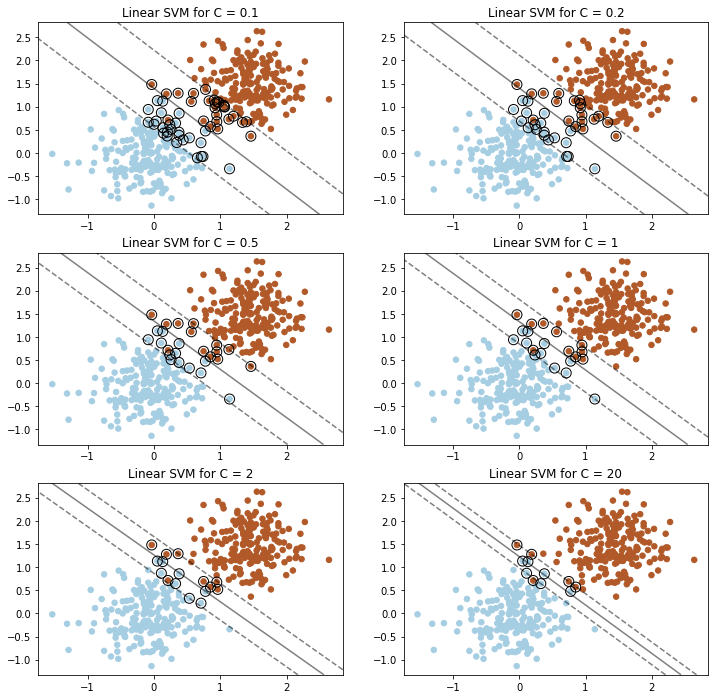

In [8]:
plt.show(fig)

Valores baixos para $C$ favorecem margens maiores.